In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cities = pd.read_csv("Cities.csv")

temp = np.asarray(cities['temperature'])
lat = np.asarray(cities['latitude'])
long = np.asarray(cities['longitude'])

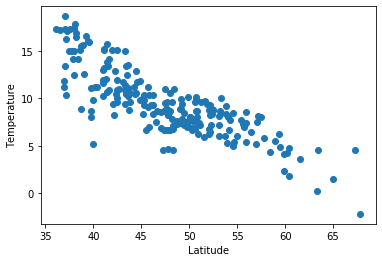

In [2]:
plt.scatter(lat, temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.show()

# Ковариация - Covariance

In [3]:
# Найдем ковариационную матрицу, составленную из попарных ковариаций элементов двух векторов - широты и температуры
np.cov(lat, temp)

# В этой матрице элементы, находящиеся на диагонали, представляют ковариацию векторов с самими собой. 
# Первое число на диагонали - для широты, второе - для температуры.

# Число вне диагонали - это как раз то число, которое нам нужно. Оно представляет собой ковариацию двух векторов -
# широты и температуры друг с другом. Обратите внимание, что число одно и то же с обоих строн диагонали.

array([[ 45.30583961, -19.75420869],
       [-19.75420869,  12.6823689 ]])

In [4]:
# Также можно получить ковариационную матрицу с помощью библиотеки Pandas и команды сov()
cities.cov()

,latitude,longitude,temperature
latitude,45.305840,-9.253050,-19.754209
longitude,-9.253050,170.772979,-7.879270
temperature,-19.754209,-7.879270,12.682369


# Коэффициент корреляции Пирсона - Pearson's R coefficient

In [5]:
# Найдем матрицу коэффициентов корреляции, составленную из попарных корреляций двух векторов - широты и температуры
np.corrcoef(lat, temp)

# В этой матрице элементы, находящиеся на диагонали, представляют корреляцию векторов с самими собой. 
# Вектор коррелирует сам с собой на 100%. Поэтому, значения на диагонали матрицы корреляций всегда будут равны 1.

# Числа вне диагонали представляют собой ковариацию двух разных векторов, в нашем случае - широты и температуры друг с другом. 
# Обратите внимание, что числа будут одними и теми же на позициях [i][j] и [j][i] матрицы

array([[ 1.        , -0.82410463],
       [-0.82410463,  1.        ]])

In [6]:
# Вы также можете найти матрицу коэффициентов корреляции для трех и более разных вектров
cor = np.corrcoef([lat, long, temp])
cor

array([[ 1.        , -0.10519576, -0.82410463],
       [-0.10519576,  1.        , -0.1693075 ],
       [-0.82410463, -0.1693075 ,  1.        ]])

In [7]:
# Также можно получить матрицу коэффициентов корреляции с помощью библиотеки Pandas и команды сorr()
cor = cities.corr()
cor

,latitude,longitude,temperature
latitude,1.000000,-0.105196,-0.824105
longitude,-0.105196,1.000000,-0.169308
temperature,-0.824105,-0.169308,1.000000


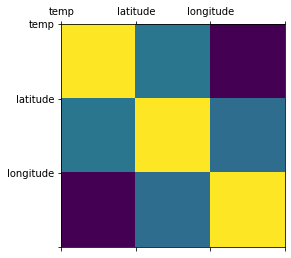

In [8]:
# Чтобы облегчить интерпретацию коэффициентов в больших матрицах часто используется визуальный метод 
# представления чисел в виде графической тепловой карты

plt.matshow(cor)
# Аналогичная команда - plt.imshow(cor)

plt.xticks(np.arange(-0.5, len(cor)), ['temp', 'latitude', 'longitude'])
plt.yticks(np.arange(-0.5, len(cor)), ['temp', 'latitude', 'longitude'])
plt.show()

# Визуализации матрицы корреляции с помощью библиотеки  Seaborn

(2.9, 0)

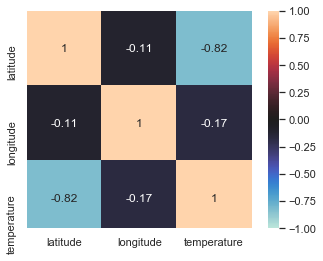

In [9]:
# Также можно воспользоваться библиотекой визуализации Seaborn
# Эта библиотека позволяет регулировать цвет и градиент (переход цвета) от позитивных значений до негативных
import seaborn as sns

sns.set()
ax = sns.heatmap(cor, vmin=-1, vmax=1, center = 0, annot=True, square=True)
ax.set_ylim(len(cor)-0.1, 0)

# Матрица коэффициентов корреляции для датасета Players

In [10]:
players = pd.read_csv("Players.csv")
c = players.corr()
c

,minutes,shots,passes,tackles,saves
minutes,1.000000,0.407923,0.815119,0.610673,0.228477
shots,0.407923,1.000000,0.343163,0.176283,-0.154958
passes,0.815119,0.343163,1.000000,0.702097,-0.062057
tackles,0.610673,0.176283,0.702097,1.000000,-0.201190
saves,0.228477,-0.154958,-0.062057,-0.201190,1.000000


(4.9, 0)

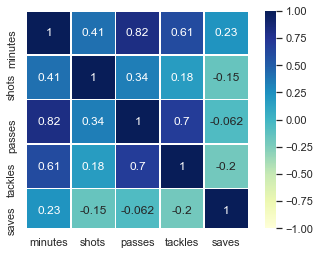

In [11]:
ax = sns.heatmap(c, vmin=-1, vmax=1, cmap = "YlGnBu", annot=True, linewidths=.5, square=True)
ax.set_ylim(len(c)-0.1, 0)

# Небольшая визуальная модификация матрицы коэффициентов корреляции

(4.9, 0)

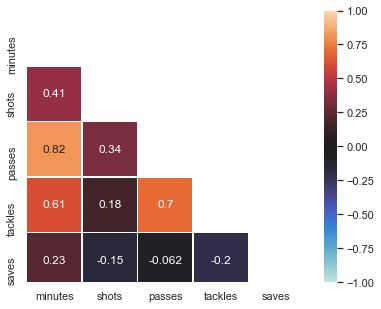

In [12]:
# Так как часть матрицы выше диагонали (upper diagonal part)  идентична части, находящейся ниже диагонали (lower diagonal part),
# то мы можем визально "отрезать" верхнюю часть и оставить только нижнюю
# это делается с помощью накладывания маски (как в Photoshop)
# cо значениями 0 для клеток выше диагонали и самой диагонали, и со значениями 1 для всех других ячеек 

corr_matrix = players.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1, center=0, square=True, linewidths=.5, annot=True)
ax.set_ylim(len(c)-0.1, 0)